# バックテスト検証ノート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../'

/home/tsu-nera/repo/bakuchi


In [3]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [4]:
# timestamp="2003142355"
timestamp="2003151604"

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(14200, 14200)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=1000)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-15 16:04:28,liquid,coincheck,BTC/JPY,0.009,19
1,2020-03-15 16:04:28,coincheck,liquid,BTC/JPY,0.009,0
2,2020-03-15 16:04:40,liquid,coincheck,BTC/JPY,0.009,19
3,2020-03-15 16:04:41,coincheck,liquid,BTC/JPY,0.009,-4
4,2020-03-15 16:04:42,liquid,coincheck,BTC/JPY,0.009,21
...,...,...,...,...,...,...
11640,2020-03-15 20:23:13,liquid,coincheck,BTC/JPY,0.009,28
11641,2020-03-15 20:23:14,coincheck,liquid,BTC/JPY,0.009,-2
11642,2020-03-15 20:23:15,liquid,coincheck,BTC/JPY,0.009,24
11643,2020-03-15 20:23:16,coincheck,liquid,BTC/JPY,0.009,0


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-15 16:04:28,買い,liquid,579038.0
1,2020-03-15 16:04:28,売り,coincheck,581207.0
2,2020-03-15 16:04:28,買い,coincheck,579038.0
3,2020-03-15 16:04:28,売り,liquid,579002.0
4,2020-03-15 16:04:40,買い,liquid,579141.0
...,...,...,...,...
23285,2020-03-15 20:23:15,売り,coincheck,593433.0
23286,2020-03-15 20:23:16,買い,coincheck,590667.0
23287,2020-03-15 20:23:16,売り,liquid,590568.0
23288,2020-03-15 20:23:17,買い,liquid,590567.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
--------  -------------------
開始日時  2020-03-15 16:04:28
終了日時  2020-03-15 20:23:19
--------  -------------------
利確しきい値 2000(JPY)
損切りマージン 1000(JPY)
取引単位 0.009(BTC)
--------

バックテスト結果
---------  ------
利益(BTC)  -0
元金(BTC)   0.022
資産(BTC)   0.022
---------  ------
---------  ------
取引回数    11645
利益(JPY)  121737
元金(JPY)   12000
資産(JPY)  133737
---------  ------


## グラフ出力

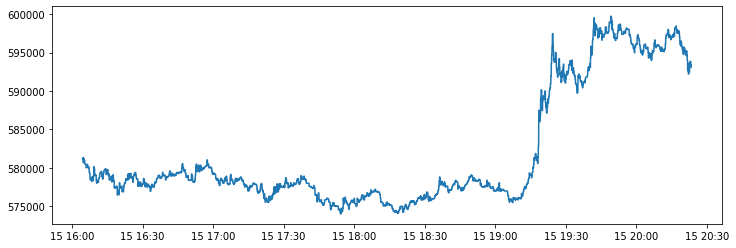

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

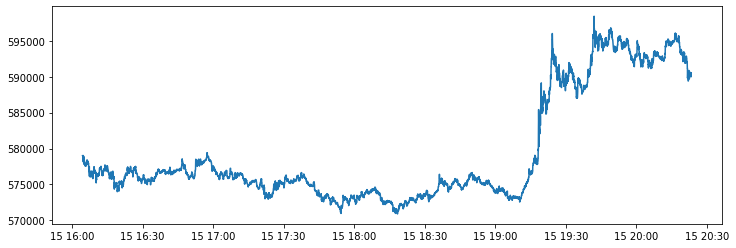

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-15 16:00:00,-240,2153,579690,577537,577297,577537
2020-03-15 16:10:00,-155,2211,578590,576380,576225,576380
2020-03-15 16:20:00,-150,1936,578264,576328,576178,576328
2020-03-15 16:30:00,-127,1974,578232,576257,576130,576257
2020-03-15 16:40:00,-141,2190,579224,577034,576893,577034
2020-03-15 16:50:00,-127,1800,579631,577831,577704,577831
2020-03-15 17:00:00,-118,1895,578401,576506,576388,576506
2020-03-15 17:10:00,-109,2169,577802,575632,575523,575632
2020-03-15 17:20:00,-142,2293,576821,574528,574386,574528
